Exploratory Data Analysis - Instacart Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
order_products_train_df = pd.read_csv("./data/order_products__train.csv")
order_products_prior_df = pd.read_csv("./data/order_products__prior.csv")
orders_df = pd.read_csv("./data/orders.csv")
products_df = pd.read_csv("./data/products.csv")
aisles_df = pd.read_csv("./data/aisles.csv")
departments_df = pd.read_csv("./data/departments.csv")

In [ ]:
# How does the data look like ?

In [3]:
print(orders_df.shape)
orders_df.head(10)

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [5]:
orders_df.groupby("eval_set")['user_id'].nunique()

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

Out of 206209 customers. 75000 are present in the test set while 131209 are present in the train set.

In [7]:
orders_df[orders_df['user_id']==3]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
26,1374495,3,prior,1,1,14,NaN
27,444309,3,prior,2,3,19,9.0
28,3002854,3,prior,3,3,16,21.0
29,2037211,3,prior,4,2,18,20.0
30,2710558,3,prior,5,0,17,12.0
31,1972919,3,prior,6,0,16,7.0
32,1839752,3,prior,7,0,15,7.0
33,3225766,3,prior,8,0,17,7.0
34,3160850,3,prior,9,0,16,7.0
35,676467,3,prior,10,3,16,17.0


Text(0.5, 1.0, 'Frequency of order by Day of Week')

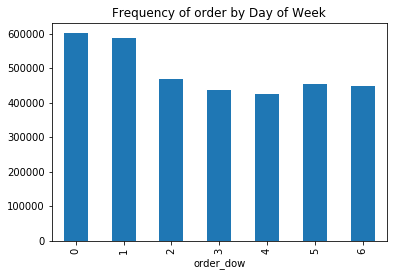

In [31]:
# Orders by DOW and HOD
orders_df.groupby('order_dow')['order_dow'].count().plot(kind='bar')
plt.title("Frequency of order by Day of Week")


Text(0.5, 1.0, 'Frequency of order by Hour of Day')

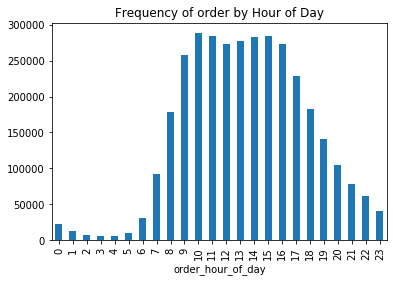

In [30]:
orders_df.groupby('order_hour_of_day')['order_hour_of_day'].count().plot(kind='bar')
plt.title("Frequency of order by Hour of Day")

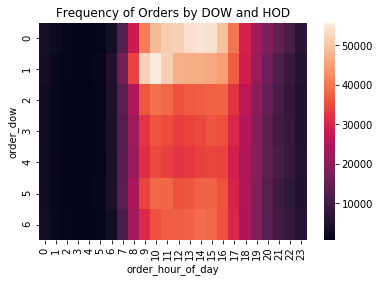

In [39]:
#Crosstab for hour of day and day of week
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].count().reset_index()
grouped_df = grouped_df.pivot(index = 'order_dow', columns = 'order_hour_of_day', values = 'order_number')

sns.heatmap(grouped_df)
plt.title("Frequency of Orders by DOW and HOD")
plt.show()

Saturday(0) evenings and Sunday(1) mornings majority orders.

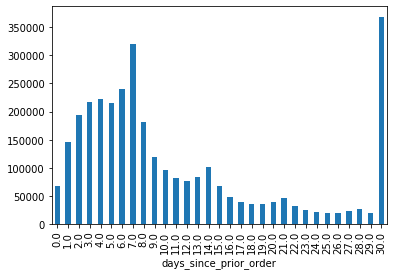

In [47]:
#Days since prior order distribution
orders_df.groupby('days_since_prior_order')['order_id'].count().plot(kind='bar')

Orders placed once in every 7 days or 14 or 21 or monthly

In [12]:
print(order_products_prior_df.shape)
order_products_prior_df.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [13]:
print(order_products_train_df.shape)
order_products_train_df.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [53]:
# % of reordered products 
print("% of reordered products from prior set ",order_products_prior_df.reordered.sum()/order_products_prior_df.shape[0])
print("% of reordered products from train set ",order_products_train_df.reordered.sum()/order_products_train_df.shape[0])

% of reordered products from prior set  0.5896974667922161
% of reordered products from train set  0.5985944127509629


In [92]:
# % of orders with no reordered items
df=order_products_prior_df.groupby(['order_id'], as_index=False)['reordered'].sum()
print("% of orders with no items reordered in prior set = ",df[df['reordered']==0].shape[0]/df.shape[0] * 100)

df=order_products_train_df.groupby(['order_id'], as_index=False)['reordered'].sum()
print("% of orders with no items reordered in train set = ",df[df['reordered']==0].shape[0]/df.shape[0] * 100)

% of orders with no items reordered in prior set =  12.084859313304348
% of orders with no items reordered in train set =  6.555952716658156


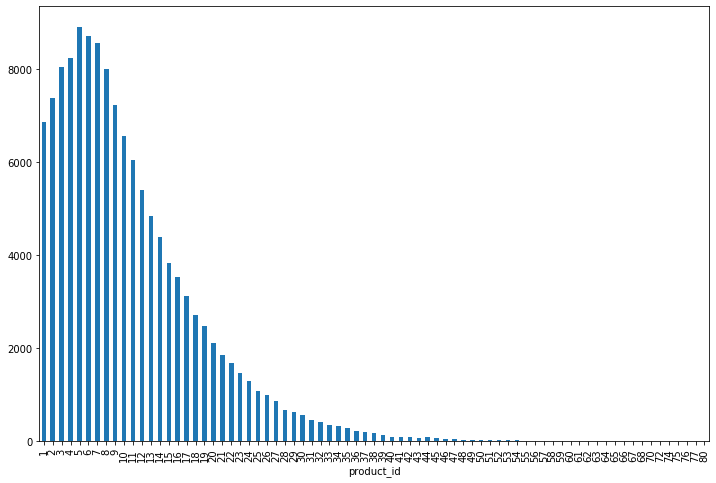

In [98]:
# of products ordered per order - train

plt.figure(figsize=(12,8))
order_products_train_df.groupby(['order_id'], as_index=False)['product_id'].count().groupby(['product_id'])['order_id'].count().plot(kind='bar')

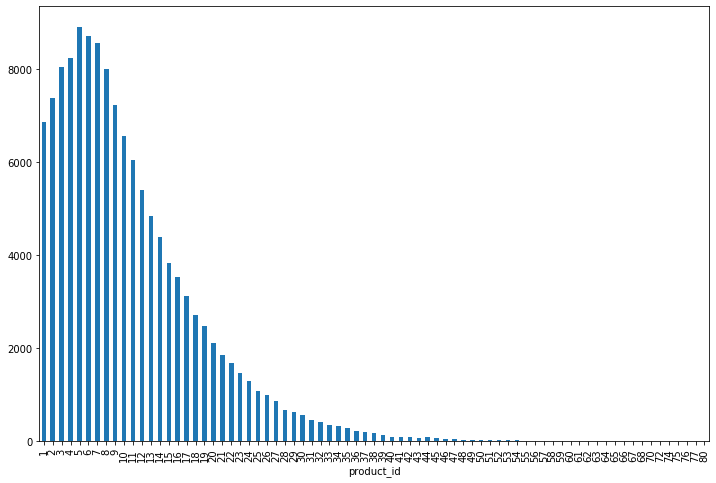

In [99]:
# of products ordered per order - prior

plt.figure(figsize=(12,8))
order_products_train_df.groupby(['order_id'], as_index=False)['product_id'].count().groupby(['product_id'])['order_id'].count().plot(kind='bar')

Maxima's at 5 products per order for both train and prior sets

##### PRODUCTS / AISLES / DEPARTMENTS
Merging with prior data to get all product, aisle and department info at one place

In [101]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [102]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [103]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [104]:
# Merging datasets
order_products_prior_df = pd.merge(order_products_prior_df,products_df,on='product_id',how='left')
order_products_prior_df = pd.merge(order_products_prior_df,aisles_df,on='aisle_id',how='left')
order_products_prior_df = pd.merge(order_products_prior_df,departments_df,on='department_id',how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


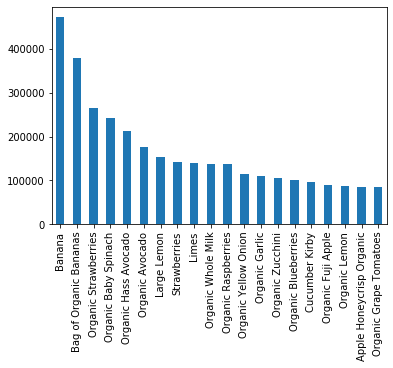

In [109]:
order_products_prior_df.product_name.value_counts().head(20).plot(kind="bar")

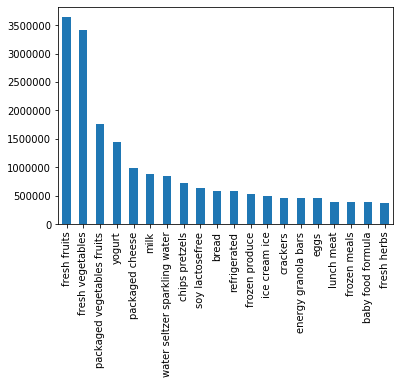

In [112]:
order_products_prior_df.aisle.value_counts().head(20).plot(kind='bar')

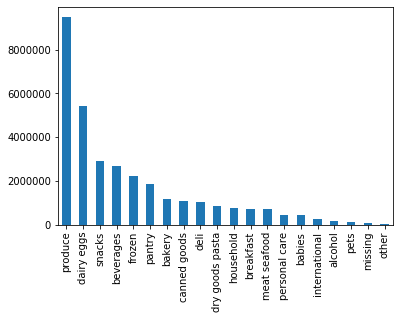

In [113]:
order_products_prior_df.department.value_counts().head(20).plot(kind='bar')

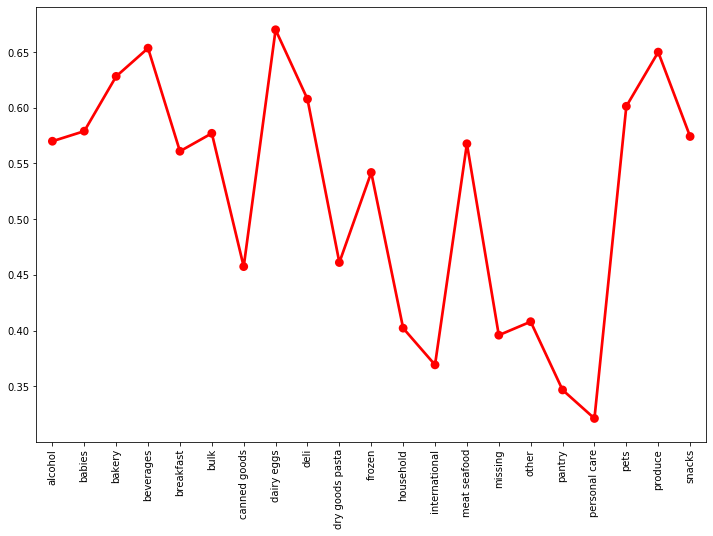

In [119]:
# Re-order ratio vs Department
df = order_products_prior_df.groupby(['department'], as_index=False)['reordered'].mean()
plt.figure(figsize=(12,8))
sns.pointplot(df['department'].values, df['reordered'].values, alpha=0.8, color='red')
plt.xticks(rotation='vertical')
plt.show()

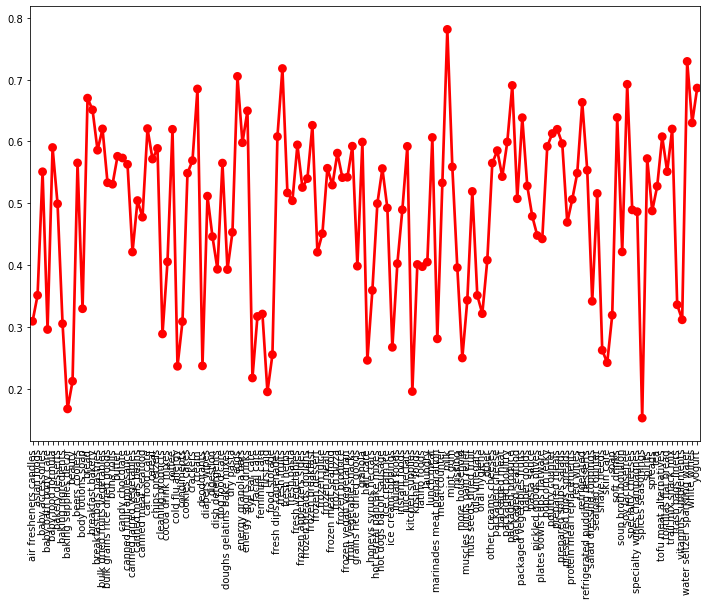

In [120]:
# Re-order ratio vs Aisle
df = order_products_prior_df.groupby(['aisle'], as_index=False)['reordered'].mean()
plt.figure(figsize=(12,8))
sns.pointplot(df['aisle'].values, df['reordered'].values, alpha=0.8, color='red')
plt.xticks(rotation='vertical')
plt.show()

C:\python\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


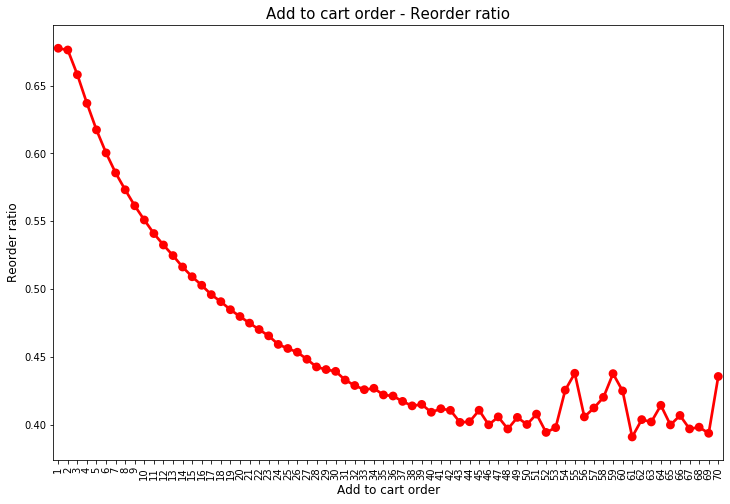

In [123]:
# Add to cart and reorder ratio
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df["add_to_cart_order_mod"].ix[order_products_prior_df["add_to_cart_order_mod"]>70] = 70
grouped_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color='red')
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()